In [4]:
import os
import sys
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib/ inline
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [2]:
train_file = 'train.csv'

In [5]:
raw_data = np.loadtxt(train_file, skiprows=1, dtype='int', delimiter=',')
x_train, x_val, y_train, y_val = train_test_split(
    raw_data[:,1:], raw_data[:,0], test_size=0.1)

In [12]:
# print(x_train[0].reshape((28,28)))
ex = x_train[0].reshape(28, 28)
for i in range(28):
    for j in range(28):
        print(ex[i][j], end = ' ')
    print('')
        

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 4 58 0 0 0 0 0 0 0 0 0 0 2 110 237 255 27 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 41 174 253 253 253 153 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 14 114 175 253 247 241 253 253 88 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 5 114 226 253 253 253 106 39 224 253 152 2 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 6 135 253 253 253 253 253 151 0 88 250 253 102 1 0 0 0 0 
0 0 0 0 0 0 0 0 0 6 135 253 253 226 216 216 216 37 0 0 230 253 253 5 0 0 0 0 
0 0 0 0 0 0 0 0 27 135 253 253 195 23 0 0 0 0 0 0 230 253 253 5 0 0 0 0 
0 0 0 0 0 0 0 5 174 253 253 195 24 0 0 0 0 0 0 0 144 253 253 5 0 0 0 0 
0 0 0 0 0 0 0 114 253 253 253 80 0 0 0 0 0 0 0 0 106 253 253 5 0 0 0 0 
0 0 0 0 0 0 14 226 253 253 212 61 0 0 0 0 0 0 0 0 54 245 253 5 0 0 0 0 
0 0 0 0 0 0 114 253 253 191 21 0 0 0 0 0 0 0 

Text(0.5, 1.0, '28x28 data')

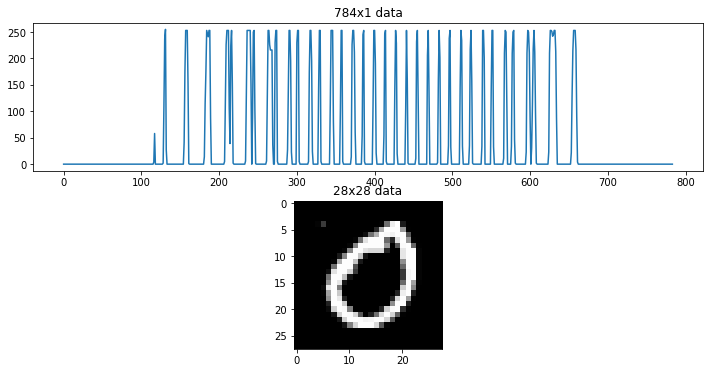

In [14]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(x_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(x_train[0].reshape(28,28), cmap='gray')
ax[1].set_title('28x28 data')

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [6]:
x_train = x_train.astype("float32")/255.
x_val = x_val.astype("float32")/255.

In [7]:
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
#example:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
model = keras.Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D( 16, (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D( 16, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D( 16, (3, 3), activation='relu'))
model.add(BatchNormalization())
#model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [9]:
datagen = keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [10]:
model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate =1e-4), metrics=["accuracy"])


In [11]:
annealer = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)


In [12]:
hist = model.fit(datagen.flow(x_train, y_train, batch_size=16),
                           steps_per_epoch=500,
                           epochs=20, #Increase this when not on Kaggle kernel
                           verbose=2,  #1 for ETA, 0 for silent
                           validation_data=(x_val[:400,:], y_val[:400,:]), #For speed
                           callbacks=[annealer])

Epoch 1/20
500/500 - 23s - loss: 0.8776 - accuracy: 0.7160 - val_loss: 0.2768 - val_accuracy: 0.8975
Epoch 2/20
500/500 - 20s - loss: 0.3608 - accuracy: 0.8901 - val_loss: 0.0901 - val_accuracy: 0.9675
Epoch 3/20
500/500 - 20s - loss: 0.2725 - accuracy: 0.9194 - val_loss: 0.1151 - val_accuracy: 0.9625
Epoch 4/20
500/500 - 19s - loss: 0.2180 - accuracy: 0.9325 - val_loss: 0.0451 - val_accuracy: 0.9850
Epoch 5/20
500/500 - 20s - loss: 0.2126 - accuracy: 0.9375 - val_loss: 0.0838 - val_accuracy: 0.9725
Epoch 6/20
500/500 - 19s - loss: 0.1779 - accuracy: 0.9469 - val_loss: 0.0391 - val_accuracy: 0.9875
Epoch 7/20
500/500 - 20s - loss: 0.1538 - accuracy: 0.9539 - val_loss: 0.0558 - val_accuracy: 0.9825
Epoch 8/20
500/500 - 20s - loss: 0.1417 - accuracy: 0.9550 - val_loss: 0.0412 - val_accuracy: 0.9875
Epoch 9/20
500/500 - 20s - loss: 0.1425 - accuracy: 0.9549 - val_loss: 0.0428 - val_accuracy: 0.9875
Epoch 10/20
500/500 - 20s - loss: 0.1321 - accuracy: 0.9607 - val_loss: 0.0387 - val_accura

In [13]:
final_loss, final_acc = model.evaluate(x_val, y_val, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0215, final accuracy: 0.9931


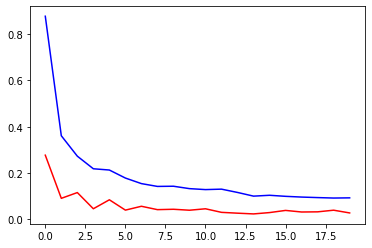

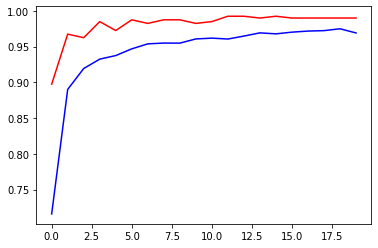

In [18]:
plt.plot(hist.history['loss'], color='b')

plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['accuracy'], color='b')
plt.plot(hist.history['val_accuracy'], color='r')
plt.show()

In [19]:
y_hat = model.predict(x_val)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_val, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[410   0   0   0   0   0   3   0   1   0]
 [  0 507   0   1   0   0   0   1   0   0]
 [  0   1 414   2   0   0   0   1   0   0]
 [  0   0   3 440   0   0   0   0   0   0]
 [  0   0   0   0 420   0   0   0   0   1]
 [  0   0   0   1   0 351   1   0   0   0]
 [  0   0   0   0   0   0 417   0   1   0]
 [  0   0   1   0   1   0   0 428   0   0]
 [  1   0   0   0   1   0   2   0 378   3]
 [  0   0   0   0   1   0   0   0   2 406]]


In [27]:
test_file = 'test.csv'
output_file = "submission.csv"


In [28]:
mnist_testset = np.loadtxt(test_file, skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.

In [29]:
y_hat = model.predict(x_test, batch_size=64)


In [30]:
y_pred = np.argmax(y_hat,axis=1)


In [31]:
with open(output_file, 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

Accuracy: 0.99085


In [33]:
model.save('99_08')


INFO:tensorflow:Assets written to: 99_08\assets


In [1]:
import tensorflowjs as tfjs

2021-07-24 16:03:15.937492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-24 16:03:15.937533: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
model = keras.models.load_model('99_08')

In [6]:
tfjs.converters.save_keras_model(model, 'tfjs_model')